In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("C:\\Users\\Nimisha Jain\\Downloads\\train.csv")
Datat= pd.read_csv("C:\\Users\\Nimisha Jain\\Downloads\\test.csv")

In [3]:
Data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
Data.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [5]:
Data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

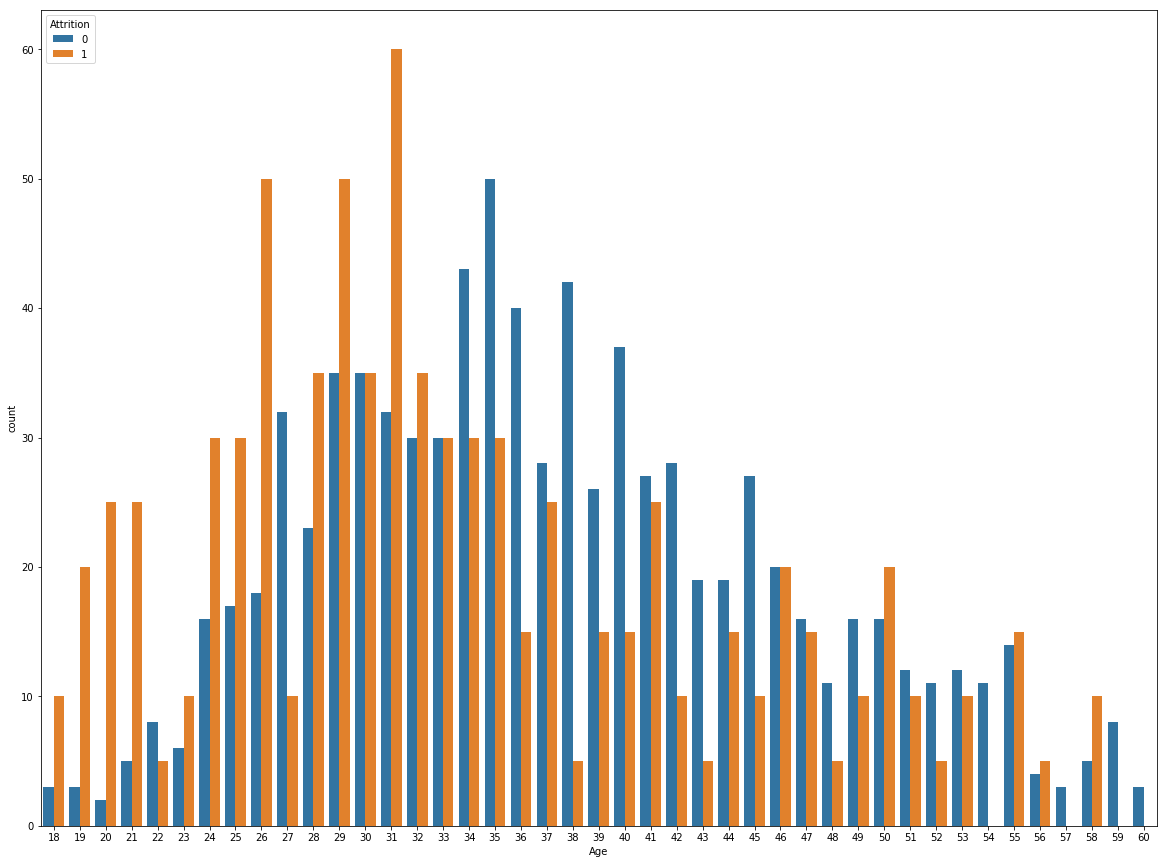

In [6]:
size = (20,15)
fig, x = plt.subplots(figsize = size)
sns.countplot(data=Data, x="Age",hue="Attrition")

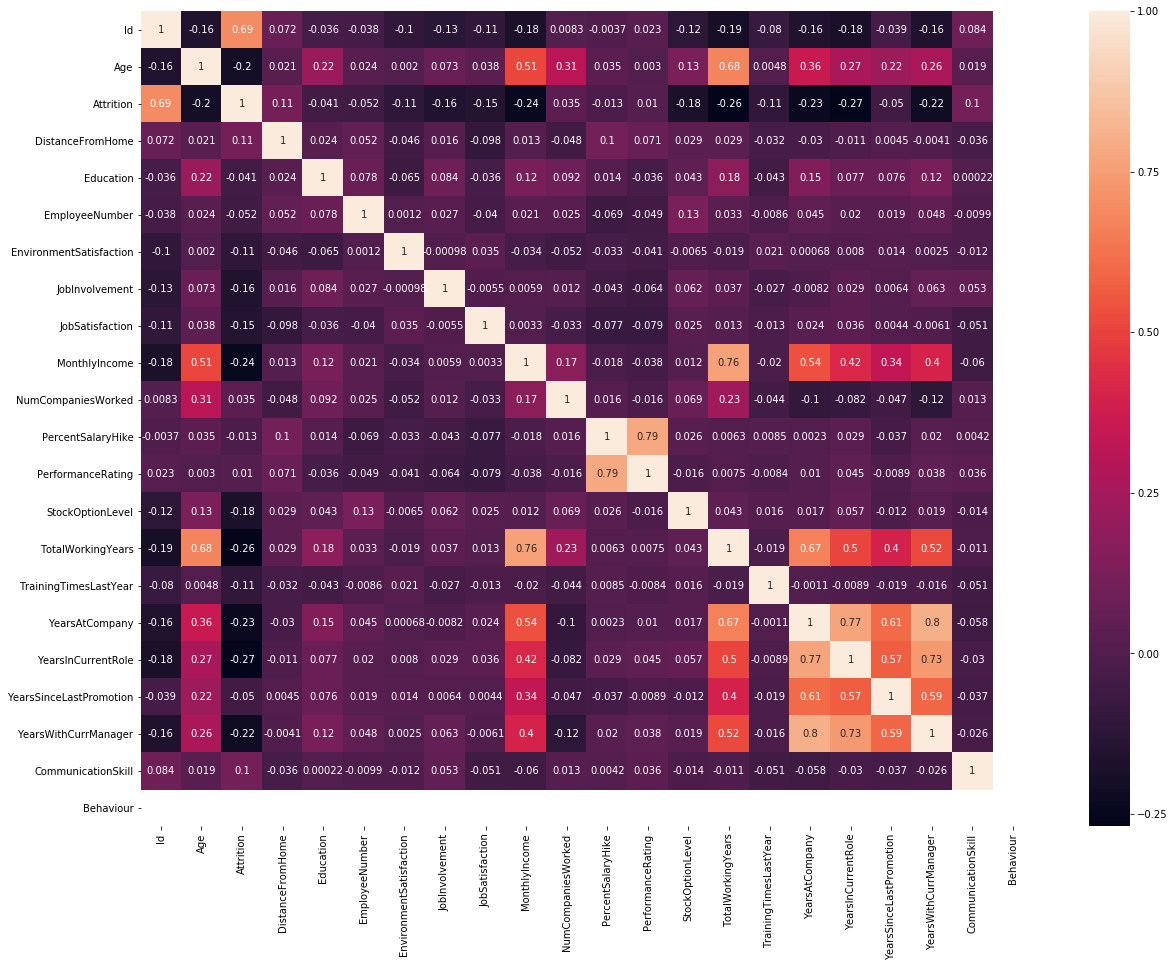

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(Data.corr(),annot=True)

In [8]:
l_a=[]
l_i=[]
for obj in Data:
    if Data[obj].dtype == 'O':
        l_a.append(obj)
    elif Data[obj].dtype == 'int64':
        l_i.append(obj)

In [9]:
t_a=[]
t_i=[]
for obj in Datat:
    if Datat[obj].dtype == 'O':
        t_a.append(obj)
    elif Datat[obj].dtype == 'int64':
        t_i.append(obj)

In [10]:
Data_int = Data[l_i]
Data_alpha = Data[l_a]

In [11]:
Datat_int = Datat[t_i]
Datat_alpha = Datat[t_a]

In [12]:
Data.shape

(1628, 29)

In [13]:
Data_int.shape

(1628, 22)

In [14]:
Data_alpha.shape

(1628, 7)

In [15]:
for col in Data_alpha.columns:
    print (str(col) + str(Data_alpha[col].unique()))
    print(Data_alpha[col].value_counts())
    print("--------------------------------------------------------------------")

BusinessTravel['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64
--------------------------------------------------------------------
Department['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64
--------------------------------------------------------------------
EducationField['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64
--------------------------------------------------------------------
Gender['Female' 'Male']
Male      996
Female    632
Name: Gender, dtype: int64
--------------------------------------------------------------------
JobR

In [16]:
dummies = Data_alpha[["JobRole","Department"]]
Data_alpha = Data_alpha.drop("JobRole",axis=1)
Data_alpha = Data_alpha.drop("Department",axis=1)
Data_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime
0,Non-Travel,Medical,Female,Single,No
1,Travel_Rarely,Life Sciences,Female,Married,Yes
2,Travel_Rarely,Medical,Male,Single,No
3,Travel_Rarely,Life Sciences,Male,Single,No
4,Travel_Rarely,Other,Male,Married,No


In [17]:
dummiest = Datat_alpha[["JobRole","Department"]]
Datat_alpha = Datat_alpha.drop("JobRole",axis=1)
Datat_alpha = Datat_alpha.drop("Department",axis=1)
Datat_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime
0,Travel_Rarely,Medical,Male,Married,No
1,Travel_Rarely,Medical,Male,Divorced,No
2,Travel_Rarely,Medical,Male,Divorced,Yes
3,Travel_Rarely,Life Sciences,Female,Married,Yes
4,Non-Travel,Life Sciences,Male,Married,No


In [18]:
dummies = pd.get_dummies(dummies)
dummiest = pd.get_dummies(dummiest)


In [19]:
dummies.head()

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0


In [20]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
for i in Data_alpha.columns:
    Data_alpha[i] = LabelEncoder.fit_transform(Data_alpha[i])
Data_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime
0,0,3,0,2,0
1,2,1,0,1,1
2,2,3,1,2,0
3,2,1,1,2,0
4,2,4,1,1,0


In [21]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
for i in Datat_alpha.columns:
    Datat_alpha[i] = LabelEncoder.fit_transform(Datat_alpha[i])
Datat_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime
0,2,3,1,1,0
1,2,3,1,0,0
2,2,3,1,0,1
3,2,1,0,1,1
4,0,1,1,1,0


In [22]:
Data_alpha = pd.concat([Data_alpha,dummies],axis=1)
Data_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,3,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,2,3,1,2,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [23]:
Datat_alpha = pd.concat([Datat_alpha,dummiest],axis=1)
Datat_alpha.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,2,3,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,3,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [24]:
Data = pd.concat([Data_alpha,Data_int],axis=1)
Data.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,0,3,0,2,0,0,0,1,0,0,...,3,0,12,2,11,7,6,7,4,1
1,2,1,0,1,1,0,0,0,0,1,...,3,2,7,2,3,2,1,1,2,1
2,2,3,1,2,0,0,0,0,0,0,...,3,0,12,3,9,7,7,3,5,1
3,2,1,1,2,0,0,0,0,0,0,...,3,0,18,2,7,7,1,7,4,1
4,2,4,1,1,0,0,0,0,0,1,...,3,1,10,2,10,7,7,8,1,1


In [25]:
Datat = pd.concat([Datat_alpha,Datat_int],axis=1)
Datat.head()

,BusinessTravel,EducationField,Gender,MaritalStatus,OverTime,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,2,3,1,1,0,0,0,0,0,0,...,4,1,5,3,5,2,0,4,5,1
1,2,3,1,0,0,0,0,0,0,0,...,4,2,13,4,7,7,5,7,3,1
2,2,3,1,0,1,0,0,0,0,0,...,3,2,13,2,7,7,6,7,4,1
3,2,1,0,1,1,0,0,0,0,1,...,3,1,8,4,4,3,0,2,5,1
4,0,1,1,1,0,0,0,1,0,0,...,3,0,9,5,9,7,0,8,2,1


In [26]:
y = Data["Attrition"]
X = Data.drop("Attrition",axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [29]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
forest.score(X_train, y_train)

0.9959049959049959

In [31]:
pred = forest.predict_proba(X_test)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_test, pred[:,1])
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.9843161402492031


In [33]:
Datat.shape

(470, 38)

In [34]:
final_status = forest.predict_proba(Datat)
new=final_status[:,1]

In [35]:
Data_final= pd.DataFrame(Datat,columns=['Id'])

In [36]:
Data_final = pd.concat([Data_final,pd.DataFrame(new,columns=['Attrition'])],axis=1)

In [37]:
Data_final.to_csv('C:/Users/Nimisha Jain/Downloads/Data_final.csv', index=False)